## Supervised ML Process

### ML Pathway

1. Collect and Store Data
2. Clean and Organise Data
3. Exploratory Data Analysis (Stat Analysis, Visualisation)
4. ML Models (for going beyond Data Analysis and creating product)
    a. Supervised Learning: predict an outcome
    b. Unsupervised Learning: discover patterns in Data


### ML Process: Supervised ML Tasks

- **Supervised ML**: Using *historical, labeled* data, predict a future outcome or result.
- Start with collecting and organise a data set based on history
- **Historical Labeled** dataset
- If a new feature vector appears, the model should be able to predict the label


### Supervised ML Process:
- Data
- X:Features, Y:Labels
- Splitting training and testing dataset (complex: cross validation, etc)
- Training/Fitting model
- Evaluate performance: comparing predictions with actual labels from the test set
- Fit/adjust model params
- Deploy model as a product


### Linear Regression

**HIstory and Motivation**:
- grew out of need for improving navigation methods based on astronomy during the 1700s.
- First public exposition on Linear Regression with least squares method in 1800..
- Gauss claimed that he invented least-squares in 1790s..
Building an intuitive understanding of Linear Regression: It implies a **constant straight line relationship**.
The simplest relationship is y = x.
Given the relationship of two or more variables, it becomes straightforward to predict the output value, when we encounter previously unseen feature values. 

**Important Point**: Real world data vairables hardly have a linear relationship, in this case we need to find a **line** that fits the data/that describes the relationship between the variables the best.
- We need to reduce the distance of each point from the line we come up with. 
- **Ordinary Least Squares** works by minimising the sum of the squares of the differences between the observed dependent var in the given dataset and those predicted by the linear function.

### OLS Equations

The equation of a simple straight line is y = mx + b, where m is the slope of the line and b is the intercept with y-axis. With this simple equation, there is only room for one possible feature. 
- OLS will allow us directly solve for the slope m and intercept b given a set of datapoints for x and y.
- In case of multiple features,we will need **Gradient Descent** and **Cost functions**.


### Cost Functions:

OLS is not suitable/suitable for multiple features. 
- The purpose is to define an appropriate error/cost function and to minimise it as much as possible so that our regression line fits the data in the best possible way. 
- **Residual error** is basically the difference between predicted value and the actual value, whereas, cost/loss functions are nothing but different variants of residual error.
- **Recall from Calculus**: To minimise a function we can take its derivative and set it equal to zero. 
- But mathematically it is not practical and scalable to compute the minimal of a function like this, instead we use **Gradient Descent**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

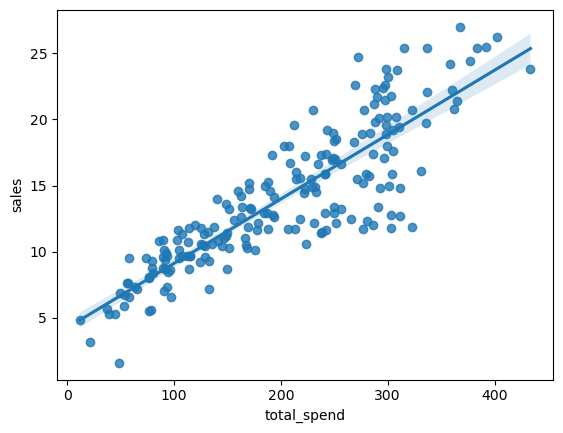

In [3]:
# With the seaborns regplot(), we can simply have a regression line going through our data using OLS for a single variable
sns.regplot(data=df, x='total_spend', y='sales')

In [4]:
X = df['total_spend']
y = df['sales']

# Polyfit here returns two beta values (weights and bias in other terms) for a linear regression for one feature
# The two variables here will establish/describe a relation between var X and y.
# Polyfit can take in higher degree polynomials
# We could be fitting some second or third order equations
# deg=1 -> y = b1.x + b0, deg=2 -> y = b2.x**2 + b1.x + b0 and so on...
b1, b2 = np.polyfit(X,y,deg=1)

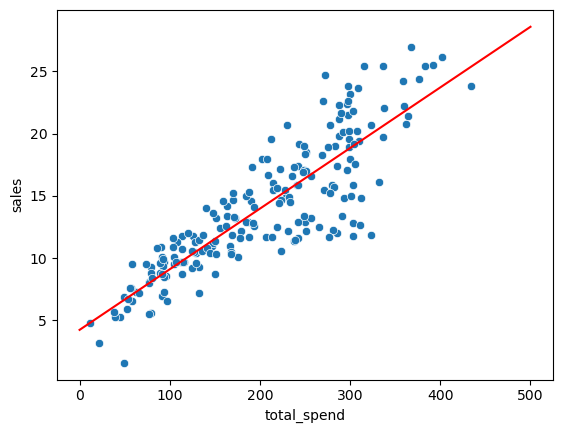

In [5]:
potential_spend = np.linspace(0,500,100)

predicted_sales = b1*potential_spend + b2

sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

*** The most important thing to learn here is: When there is a single variable -> dependent on another single variable, we go with np.polyfit(). The relation could be a linear or polynomial but the intuition to use np.polyfit() should be there when there is a linear/polynomial relation between two individual features. ***

### Scikit-learn

- a lib containing many ML algorithms
- uses a generalised 'estimator API' framework to calling the models.
- the way algos are import, fitted and used in uniform across all algo...
    - This enables users to easily swap algos
- This also means that users can implement almost any algo effectively without truly understanding what that algo does.

sklearn also comes with
- train test split functions
- cross validation tools 
- variety of reporting metric functions

The following framework will be similar for any supervised algo. The conventional way of importing a model in sklearn is as follows:

’’’ from sklearn.model_family import ModelAlgo
mymodel = ModelAlgo(param1, param2)
mymodel.fit(X_train, y_train)
preds = mymodel.predict(X_test)

from sklearn.metrics import error_metric
performance = error_metric(y_test, preds) ’’’

In [6]:
# One of the most import module for train test split in ML
from sklearn.model_selection import train_test_split

### Let us do Linear Regression with Scikit-Learn

**Data setup and Model training**



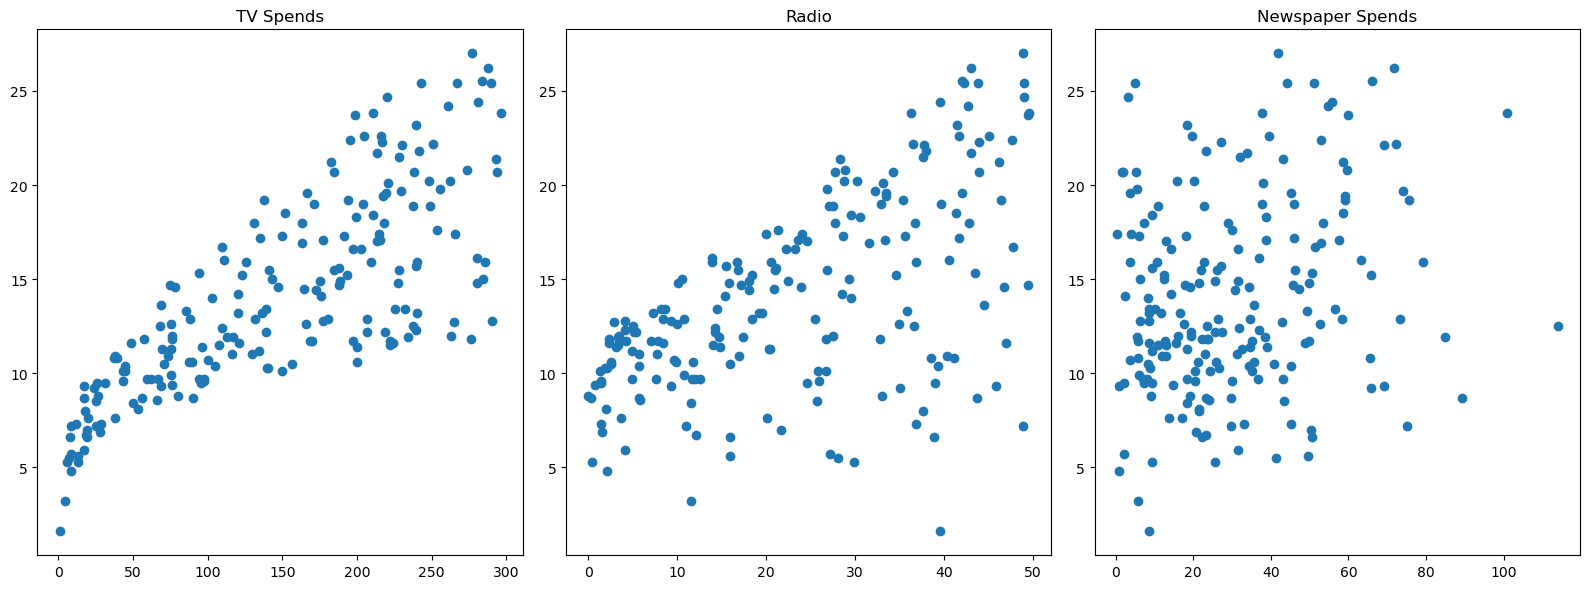

In [7]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(16,6))

axs[0].plot(df['TV'], df['sales'], 'o')
axs[0].set_title('TV Spends')

axs[1].plot(df['radio'], df['sales'], 'o')
axs[1].set_title('Radio')

axs[2].plot(df['newspaper'], df['sales'], 'o')
axs[2].set_title('Newspaper Spends')
plt.tight_layout()

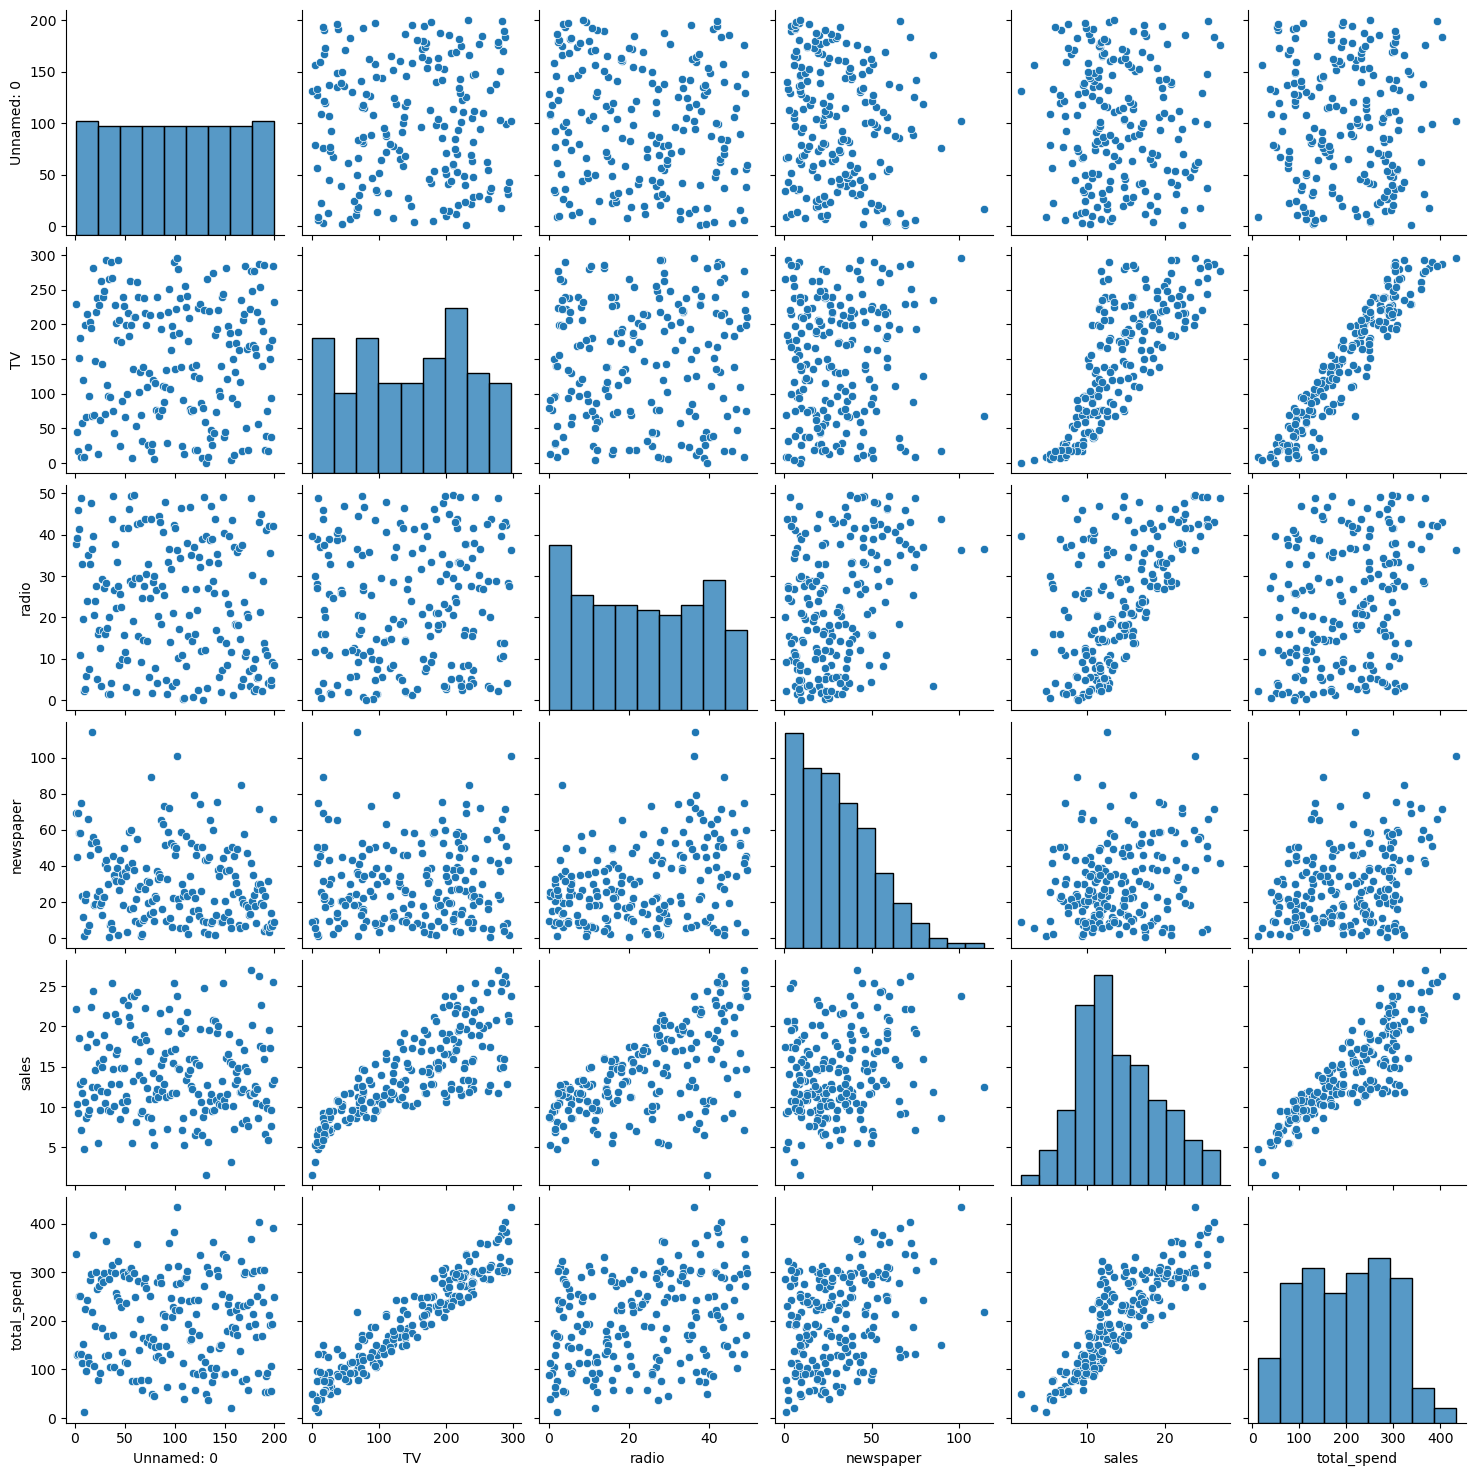

In [8]:
# Instead of writing all the code above, we can simply use seaborn and do
sns.pairplot(df)

- Once we are sure that there is some kind of relationship that we can derive using linear regression, we have to prepare the data first
- In order to prepare the data, we first need to specify which data are the features and which data are the labels.
- once we have that, we can split the data according to train and test and then fit/train our model.
    - using the train_test_split from sklearn, we also need to specify **test_size** that specifies the proportion of the split, and **random_state** which randomises the split. Using the same value is important for reproducibility. 

In [29]:
X = df.drop('sales', axis=1).drop('total_spend', axis=1).drop('Unnamed: 0', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Model training

In ML and DL, it is common practice to use the default version of the model to measure baseline performance, and then in order to improve performance we can tweak the params/hyperparams. 

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
# Model training
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Making model preds
y_preds = model.predict(X_test)

### Performance Evaluation

Now that we were able to train a model on the training data, the question is how do we evaluate its performance?

- We have the known output labels against the predicted labels
- **Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)**
- **Metrics designed for Regression tasks**: 
    - Mean Absolute Error: simpler to understand, wont punish large errors
    - Mean Squared Error: Larger errors are punished more, reports error in unit**2
    - Root Mean Squared Error: root MSE, most popular
- Context and domain knowledge is important to compare performance metrics. 
    

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred=y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mae, mse, rmse)

1.5116692224549084 3.79679723671522 1.9485372043446387


### Residual Plots

Often in Linear Regression it is a good idea to calculate residuals instead of just calculating performance metrics. 
- Visualising Residual Plots can help us understand if the Linear Regression was the correct choice for the data or not. 
    - But how do we visualise where there are multiple features involved?
    - **Residuale Errors**: should be random and close to a normal distribution.

- The plot below of residual loss vs y_test clearly shows that there are no apparent patterns (like a line or something), and the scatter is completely random.
    - If somthing like this does happen, it would indicate that something is not right with the choice of the model, and linear regression is not the correct model choice for the dataset. 
    - The plot below should also be distributed AROUND ZERO.

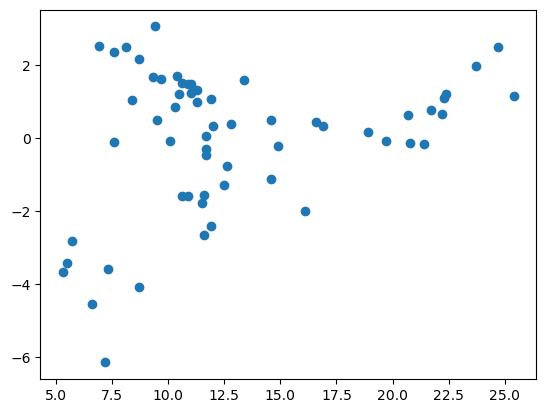

In [34]:
residuals = y_test - y_preds

plt.scatter(y_test, residuals)

### Deployment

Once we make sure that the params look great, based on the model's performance on the test dataset, we can go ahead think of deployment of the model. 

For deployment we can think of initialising a new model instance and then train the model on the entire dataset so that we can harness the advantage of more data that would make our model more accurate. 

- Once the final model is trained, we can think of the final coefficients of the model. We can take a look at the trained coefficient (in the case of Linear regression, these are params that were trained)
- What does the following coefficients mean?
    - Roughly it means, that for each unit increase in X1 feature (here, TV spending), the sale is expected to be increased by 0.044 units, and for each unit increase in radio spend (or X2 feature), the sale is expected to increase 0.199 units.
    - This interpretation is valid **only if all the features are in the same unit**. 
    - If the features are not in the same unit, we need to do **normalize the data first** before we start to train the model. 

In [35]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [39]:
print(final_model.coef_)

[ 0.04576465  0.18853002 -0.00103749]


The final deployment/saving of the model is an essential part in transfering knowledge and deployment of the model for new unseen real world data. One of the ways we could do this is using **joblib** as follows: 

In [37]:
from joblib import dump, load

dump(final_model, 'final_linRegression.joblib')

['final_linRegression.joblib']

In [38]:
loaded_model = load('final_linRegression.joblib')
print(loaded_model.coef_)

[ 0.04576465  0.18853002 -0.00103749]


### Polynomial Regression

How can we improve on a Linear Regression model?
- one approach is to consider ***higher order relationships on the features***.
    - There are two approaches that poly regression is going to address:
        - Non-linear feature relation to label
        - interaction terms between features.
    - The motivation behind poly Regression: *** to be able to find accurate beta coefficients for higher orders of the feature if the relation between the original feature is non linear ***.


**Interaction Terms** :
What if standalone features are not significant, but when combined with other features, they become more significant?
- How can we **quantitatively** check for this?
    - The simlpest way to do this is to create an a new feature that multiplies two existing features together to create an **interaction term**. We can keep the orignial features and add on this interaction term.
    - Scikit learn does all of this using a pre-processing call. (i.e. **PolynomialFeatures**)
        - What this does is create a set of different features based on the original features. Given the degree 2, it creates, for each feature Xi, Xi**2 and it also creates interaction terms for all the features, such as XixXj, XjxXk, etc. 


In [44]:
#df = df.drop(['Unnamed: 0', 'total_spend'], axis=1)
X = df.drop('sales', axis=1)
y = df['sales']

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Here we are just creating an instance of PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Here also we are just currently fitting the instance on our data, in order to apply these conversion, we need to use transform()
polynomial_converter.fit(X)

# This is where the transformation of our features happen based on the instance param configuration as shown above.
poly_features = polynomial_converter.transform(X)

# A great substitute to the above two steps is to use fit_transform(features) which essentially does the same thing. 

In [46]:
poly_features.shape

(200, 9)